# Team 18 Final Project

In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor


In [2]:
#import csv
corn = pd.read_csv('Corn Commodity Data.csv')
corn['Quarter'] = corn['Quarter'].str.extract('(\d+)', expand=False)
corn.columns

Index(['Year', 'Quarter', 'Cash Price ($/bu)', 'Beginning Stocks (Million bu)',
       'Ending Stocks', 'Exports', 'Imports', 'Total Supply',
       'Total Disapearance', 'Total Domestic Use', 'Stocks-to-Use'],
      dtype='object')

In [3]:
newcorn = corn.rename(columns={"Cash Price ($/bu)": "CashPrice", "Beginning Stocks (Million bu)": "BeginningStocks"})
newcorn.head(3)

,Year,Quarter,CashPrice,BeginningStocks,Ending Stocks,Exports,Imports,Total Supply,Total Disapearance,Total Domestic Use,Stocks-to-Use
0,1980,1,3.027,2034.3,6595.9,687.867,0.292,8673.988,2078.088,1390.221,3.174023
1,1980,2,3.197,6595.9,4662.4,645.974,0.003,6595.903,1933.503,1287.529,2.411375
2,1980,3,3.244,4662.4,2773.5,613.953,0.046,4662.446,1888.946,1274.993,1.468279


In [4]:
#check size of data set
newcorn.shape

(164, 11)

In [5]:
#check null values of data set
newcorn.isna().sum()

Year                  0
Quarter               0
CashPrice             0
BeginningStocks       0
Ending Stocks         0
Exports               0
Imports               0
Total Supply          0
Total Disapearance    0
Total Domestic Use    0
Stocks-to-Use         0
dtype: int64

In [6]:
newcorn.corr()['CashPrice'].nlargest(8)

CashPrice             1.000000
Imports               0.638609
Year                  0.557962
Total Domestic Use    0.418328
Total Disapearance    0.401249
BeginningStocks       0.068771
Total Supply          0.037333
Exports              -0.057501
Name: CashPrice, dtype: float64

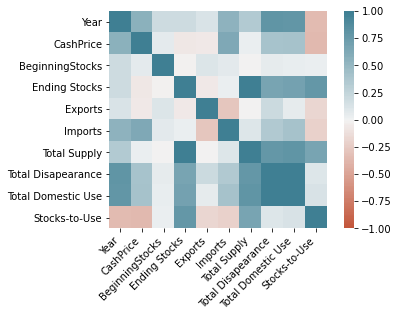

In [7]:
corr = newcorn[['Year', 'Quarter', 'CashPrice', 'BeginningStocks', 'Ending Stocks',
       'Exports', 'Imports', 'Total Supply', 'Total Disapearance',
       'Total Domestic Use', 'Stocks-to-Use']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [8]:
x = newcorn[['Year', 'BeginningStocks', 'Ending Stocks',
       'Exports', 'Imports', 'Total Supply', 'Total Disapearance',
       'Total Domestic Use', 'Stocks-to-Use']]
y = newcorn[['CashPrice']]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 3)

In [9]:
x = sm.add_constant(x)

In [10]:
LR = LinearRegression().fit(xtrain, ytrain)
LRtrainpred = LR.predict(xtrain)
LRtestpred = LR.predict(xtest)
LRtestpred

array([[2.86015636],
       [2.62351396],
       [2.30859103],
       [4.30383423],
       [4.54294517],
       [2.53027315],
       [2.88848244],
       [2.50125005],
       [2.79475813],
       [2.74740352],
       [2.27811134],
       [2.75151545],
       [2.09785055],
       [2.55666469],
       [3.79512663],
       [2.9267804 ],
       [2.67348143],
       [1.73739896],
       [1.61365521],
       [2.98655168],
       [3.17156247],
       [2.99422818],
       [4.18786763],
       [2.96276886],
       [2.78723852],
       [2.84547593],
       [3.29810432],
       [2.62465583],
       [3.16331022],
       [2.11113672],
       [2.70944132],
       [4.47331444],
       [3.79678959],
       [2.9182963 ],
       [2.70264333],
       [2.34785072],
       [2.79732708],
       [1.06908897],
       [2.33333116],
       [2.91327127],
       [1.29338002]])

In [11]:
LRtrainmse = metrics.mean_squared_error(ytrain, LRtrainpred)
LRtestmse = metrics.mean_squared_error(ytest, LRtestpred) 
print('LR train vs test MSE: ', LRtrainmse, 'vs', LRtestmse)
print('MSE difference:       ', (LRtrainmse-LRtestmse))

LR train vs test MSE:  0.6746804234872446 vs 0.6542461734752122
MSE difference:        0.020434250012032362


In [12]:
model = sm.OLS(newcorn['CashPrice'], x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CashPrice   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     28.84
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           3.10e-25
Time:                        20:36:27   Log-Likelihood:                -199.02
No. Observations:                 164   AIC:                             414.0
Df Residuals:                     156   BIC:                             438.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 87.0518     34.593      2.516      0.013      18.721     155.383
Year                  -0.0437      0.018     -2.487      0.014      -0.078      -0.009
BeginningStocks     6.084e-06   2.51e-05      0.242      0.809   -4.36e-05    5.58e-05
Ending Stocks         -0.0006      0.000     -3.874      0.000      -0.001      -0.000
Exports               -0.0005      0.000     -1.317      0.190      -0.001       0.000
Imports                0.0756      0.013      5.935      0.000       0.050       0.101
Total Supply           0.0001   7.93e-05      1.605      0.111   -2.94e-05       0.000
Total Disapearance     0.0008      0.000      3.479      0.001       0.000       0.001
Total Domestic Use     0.0013      0.000      3.572      0.000       0.001       0.002
Stocks-to-Use          0.4726      0.275      1.716      0.088      -0.071       1.016
==============================================================================
Omnibus:                       33.629   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.990
Skew:                           1.106   Prob(JB):                     1.40e-11
Kurtosis:                       4.556   Cond. No.                     7.32e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.45e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
X2 = x
X2 = X2.drop(columns=['Exports'])
model2 = sm.OLS(newcorn['CashPrice'], X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CashPrice   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     28.84
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           3.10e-25
Time:                        20:36:28   Log-Likelihood:                -199.02
No. Observations:                 164   AIC:                             414.0
Df Residuals:                     156   BIC:                             438.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 87.0518     34.593      2.516      0.013      18.721     155.383
Year                  -0.0437      0.018     -2.487      0.014      -0.078      -0.009
BeginningStocks     6.084e-06   2.51e-05      0.242      0.809   -4.36e-05    5.58e-05
Ending Stocks         -0.0005      0.000     -2.040      0.043      -0.001    -1.5e-05
Imports                0.0756      0.013      5.935      0.000       0.050       0.101
Total Supply       -4.743e-05      0.000     -0.236      0.814      -0.000       0.000
Total Disapearance     0.0004      0.000      1.036      0.302      -0.000       0.001
Total Domestic Use     0.0018      0.001      2.503      0.013       0.000       0.003
Stocks-to-Use          0.4726      0.275      1.716      0.088      -0.071       1.016
==============================================================================
Omnibus:                       33.629   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.990
Skew:                           1.106   Prob(JB):                     1.40e-11
Kurtosis:                       4.556   Cond. No.                     8.99e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.95e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
X3 = X2
X3 = X3.drop(columns=['BeginningStocks'])
model3 = sm.OLS(newcorn['CashPrice'], X3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CashPrice   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     33.84
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           5.23e-26
Time:                        20:36:28   Log-Likelihood:                -199.05
No. Observations:                 164   AIC:                             412.1
Df Residuals:                     157   BIC:                             433.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 84.5492     32.911      2.569      0.011      19.544     149.555
Year                  -0.0424      0.017     -2.536      0.012      -0.076      -0.009
Ending Stocks         -0.0005      0.000     -2.133      0.034      -0.001    -3.6e-05
Imports                0.0755      0.013      5.948      0.000       0.050       0.101
Total Supply       -4.289e-05      0.000     -0.215      0.830      -0.000       0.000
Total Disapearance     0.0004      0.000      1.090      0.277      -0.000       0.001
Total Domestic Use     0.0018      0.001      2.499      0.013       0.000       0.003
Stocks-to-Use          0.4941      0.260      1.902      0.059      -0.019       1.007
==============================================================================
Omnibus:                       32.516   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.397
Skew:                           1.085   Prob(JB):                     5.10e-11
Kurtosis:                       4.492   Cond. No.                     1.24e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
X4 = X3
X4 = X4.drop(columns=['Total Supply'])
model4 = sm.OLS(newcorn['CashPrice'], X4)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CashPrice   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     33.84
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           5.23e-26
Time:                        20:36:28   Log-Likelihood:                -199.05
No. Observations:                 164   AIC:                             412.1
Df Residuals:                     157   BIC:                             433.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 84.5492     32.911      2.569      0.011      19.544     149.555
Year                  -0.0424      0.017     -2.536      0.012      -0.076      -0.009
Ending Stocks         -0.0005      0.000     -3.928      0.000      -0.001      -0.000
Imports                0.0755      0.013      5.948      0.000       0.050       0.101
Total Disapearance     0.0004      0.001      0.669      0.505      -0.001       0.002
Total Domestic Use     0.0018      0.001      2.499      0.013       0.000       0.003
Stocks-to-Use          0.4941      0.260      1.902      0.059      -0.019       1.007
==============================================================================
Omnibus:                       32.516   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.397
Skew:                           1.085   Prob(JB):                     5.10e-11
Kurtosis:                       4.492   Cond. No.                     3.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X5 = X4
X5 = X5.drop(columns=['Total Disapearance'])
model5 = sm.OLS(newcorn['CashPrice'], X5)
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CashPrice   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     40.67
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           9.64e-27
Time:                        20:36:28   Log-Likelihood:                -199.28
No. Observations:                 164   AIC:                             410.6
Df Residuals:                     158   BIC:                             429.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 80.8702     32.391      2.497      0.014      16.895     144.846
Year                  -0.0405      0.016     -2.461      0.015      -0.073      -0.008
Ending Stocks         -0.0005      0.000     -3.884      0.000      -0.001      -0.000
Imports                0.0722      0.012      6.186      0.000       0.049       0.095
Total Domestic Use     0.0022      0.000      4.683      0.000       0.001       0.003
Stocks-to-Use          0.4680      0.256      1.826      0.070      -0.038       0.974
==============================================================================
Omnibus:                       30.505   Durbin-Watson:                   0.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.251
Skew:                           1.063   Prob(JB):                     6.69e-10
Kurtosis:                       4.290   Cond. No.                     3.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^2$ value is 0.563

In [42]:
DC1 = newcorn[['Year', 'Quarter', 'CashPrice', 'BeginningStocks', 
               'Ending Stocks', 'Exports', 'Imports', 'Total Supply',
       'Total Disapearance', 'Total Domestic Use', 'Stocks-to-Use']]
DC1_dummies = pd.get_dummies(DC1.Quarter, prefix  = 'Quarter')
DC1_dummies.head()

,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [43]:
DC1 = pd.concat([DC1, DC1_dummies], axis=1)
DC1.drop(columns=['Quarter'])

,Year,CashPrice,BeginningStocks,Ending Stocks,Exports,Imports,Total Supply,Total Disapearance,Total Domestic Use,Stocks-to-Use,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,1980,3.027,2034.300,6595.900,687.867,0.292,8673.988,2078.088,1390.221,3.174023,1,0,0,0
1,1980,3.197,6595.900,4662.400,645.974,0.003,6595.903,1933.503,1287.529,2.411375,0,1,0,0
2,1980,3.244,4662.400,2773.500,613.953,0.046,4662.446,1888.946,1274.993,1.468279,0,0,1,0
3,1980,3.054,2773.500,1392.100,443.312,0.507,2774.007,1381.907,938.595,1.007376,0,0,0,1
4,1981,2.424,1392.100,7601.100,519.079,0.110,9510.860,1909.760,1390.681,3.980134,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,2019,3.163,5002.987,1919.462,550.383,5.551,5008.538,3089.076,2538.693,0.621371,0,0,0,1
160,2020,3.630,1919.462,11293.750,448.830,5.750,16036.661,4742.911,4294.081,2.381185,1,0,0,0
161,2020,4.268,11293.750,7696.148,661.349,5.438,11299.188,3603.040,2941.691,2.136015,0,1,0,0
162,2020,5.306,7696.148,4109.740,1041.754,7.062,7703.210,3593.470,2551.716,1.143669,0,0,1,0


In [44]:
DC1.columns

Index(['Year', 'Quarter', 'CashPrice', 'BeginningStocks', 'Ending Stocks',
       'Exports', 'Imports', 'Total Supply', 'Total Disapearance',
       'Total Domestic Use', 'Stocks-to-Use', 'Quarter_1', 'Quarter_2',
       'Quarter_3', 'Quarter_4'],
      dtype='object')

In [45]:
x2 = DC1[['Year', 'Quarter', 'CashPrice', 'BeginningStocks', 'Ending Stocks',
       'Exports', 'Imports', 'Total Supply', 'Total Disapearance',
       'Total Domestic Use', 'Stocks-to-Use', 'Quarter_1', 'Quarter_2',
       'Quarter_3', 'Quarter_4']]
y2 = DC1[['CashPrice']]
x2train, x2test, y2train, y2test = train_test_split(x2, y2, test_size=0.25, random_state = 3)

In [46]:
x2 = sm.add_constant(x2)

In [48]:
LR2 = LinearRegression().fit(x2train, y2train)
LR2trainpred = LR2.predict(x2train)
LR2testpred = LR2.predict(x2test)
LR2testpred

array([[1.9  ],
       [3.054],
       [2.582],
       [5.065],
       [4.024],
       [2.271],
       [2.163],
       [2.532],
       [2.049],
       [1.861],
       [3.271],
       [2.184],
       [2.578],
       [2.4  ],
       [3.648],
       [4.268],
       [2.49 ],
       [1.468],
       [2.424],
       [2.313],
       [2.711],
       [2.002],
       [6.064],
       [2.49 ],
       [2.191],
       [2.447],
       [3.889],
       [1.898],
       [5.873],
       [2.468],
       [2.042],
       [3.463],
       [3.58 ],
       [3.339],
       [3.562],
       [3.192],
       [3.274],
       [1.439],
       [2.196],
       [2.354],
       [2.08 ]])

In [49]:
LR2trainmse = metrics.mean_squared_error(y2train, LR2trainpred)
LR2testmse = metrics.mean_squared_error(y2test, LR2testpred) 
print('LR train vs test MSE: ', LR2trainmse, 'vs', LR2testmse)
print('MSE difference:       ', (LR2trainmse-LR2testmse))

LR train vs test MSE:  4.317744784964601e-25 vs 4.107605636018729e-25
MSE difference:        2.1013914894587158e-26
